In [20]:
import numpy as np
import pandas as pd
import googlemaps
import math
import csv
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import geopandas
import plotly.express as px

In [21]:
gmaps = googlemaps.Client(key = "ENTER YOUR GOOGLE MAPS API KEY HERE")
Locations = []

ImportList = input("Load previously saved csv file location list?\nEnter'Y' for yes and 'N' for no\n")
if (ImportList == 'Y'):
    with open("Locations.csv",newline='') as f:
        reader = csv.reader(f)
        Locations = list(reader)
        
    for i in range(len(Locations)):
        Locations[i] = Locations[i][0]

Entry = input("Enter place to visit:\nEnter 'stop' to stop\n")
while (Entry != 'stop'):
    if (Entry not in Locations):
        Locations.append(Entry)
    Entry = input("Enter place to visit:\n Enter 'stop' to stop\n")

In [22]:
Locations

['Champaign, IL',
 'Chicago, IL',
 'Minneapolis, MN',
 'Glacier National Park, MT',
 'Seattle, WA',
 'Pittsburgh, PA',
 'Boston, MA',
 'San Diego, CA',
 'Miami, FL',
 'Albuquerque, NM',
 'Denver, CO',
 'New Orleans, LA',
 'Zion National Park, UT',
 'Los Angeles, CA',
 'San Francisco, CA',
 'Canyonlands National Park, UT',
 'Yosemite National Park, CA',
 'Yellowstone National Park, WY',
 'Knoxville, TN',
 'Washington DC, DC',
 'Philadelphia, PA',
 'Greensboro, NC',
 'Nashville, TN',
 'St. Louis, MO',
 'Las Vegas, NV',
 'New York, NY',
 'Niagara Falls, NY',
 'Capitol Reef National Park, UT',
 'Grand Canyon National Park, AZ',
 'Arches National Park, UT',
 'Bryce Canyon National Park, UT',
 'Portland, OR',
 'Badlands National Park, SD',
 'Lake of the Clouds, MI',
 'Traverse City, MI']

In [23]:
RemoveLoc = input("Remove any location? 'Y' for yes and 'N' for no\n")
if RemoveLoc == 'Y':
    LocEntry = input("Enter Location: Enter 'stop' to stop\n")
    while (LocEntry != 'stop'):
        Locations.remove(LocEntry)
        LocEntry = input("Enter Location: Enter 'stop' to stop\n")
        

In [24]:
Locations

['Champaign, IL',
 'Chicago, IL',
 'Minneapolis, MN',
 'Glacier National Park, MT',
 'Seattle, WA',
 'Pittsburgh, PA',
 'Boston, MA',
 'San Diego, CA',
 'Miami, FL',
 'Albuquerque, NM',
 'Denver, CO',
 'New Orleans, LA',
 'Zion National Park, UT',
 'Los Angeles, CA',
 'San Francisco, CA',
 'Canyonlands National Park, UT',
 'Yosemite National Park, CA',
 'Yellowstone National Park, WY',
 'Knoxville, TN',
 'Washington DC, DC',
 'Philadelphia, PA',
 'Greensboro, NC',
 'Nashville, TN',
 'St. Louis, MO',
 'Las Vegas, NV',
 'New York, NY',
 'Niagara Falls, NY',
 'Capitol Reef National Park, UT',
 'Grand Canyon National Park, AZ',
 'Arches National Park, UT',
 'Bryce Canyon National Park, UT',
 'Portland, OR']

In [25]:
if ImportList == 'Y':

    ImportedDistanceMatrix = np.genfromtxt("C:\\TV\\Distance.csv",delimiter=",")
    ImportedDurationMatrix = np.genfromtxt("C:\\TV\\Duration.csv",delimiter=",")

In [26]:
DistanceMatrix = np.zeros((len(Locations),len(Locations)))
DurationMatrix = np.zeros((len(Locations),len(Locations)))

if ((ImportList =='N') or (RemoveLoc =='Y')):

    for i in range(len(Locations)):
        for j in range(len(Locations)):
                TestGeoCode = gmaps.distance_matrix(Locations[i],Locations[j])
                if (i != j):
                    if (TestGeoCode['rows'][0]['elements'][0]['status'] == 'OK'):
                        DistanceMatrix[i][j] = TestGeoCode['rows'][0]['elements'][0]['distance']['value']/1000
                        DurationMatrix[i][j] = TestGeoCode['rows'][0]['elements'][0]['duration']['value']/3600
                    else:
                        DistanceMatrix[i][j] = 1000000000 
                        DurationMatrix[i][j] = 1000000000


if ((RemoveLoc == 'N') and (ImportList == 'Y')):

    for i in range(len(Locations)):
        for j in range(len(Locations)):
            if ((i < len(ImportedDistanceMatrix)) and (j < len(ImportedDistanceMatrix))):
                DistanceMatrix[i][j] = ImportedDistanceMatrix[i][j]
                DurationMatrix[i][j] = ImportedDurationMatrix[i][j]
            else:
                TestGeoCode = gmaps.distance_matrix(Locations[i],Locations[j])
                if (i != j):
                    if (TestGeoCode['rows'][0]['elements'][0]['status'] == 'OK'):
                        DistanceMatrix[i][j] = TestGeoCode['rows'][0]['elements'][0]['distance']['value']/1000
                        DurationMatrix[i][j] = TestGeoCode['rows'][0]['elements'][0]['duration']['value']/3600
                    else:
                        DistanceMatrix[i][j] = 1000000000
                        DurationMatrix[i][j] = 1000000000

In [27]:
# DistanceMatrix = np.zeros((len(Locations),len(Locations)))

# for i in range(len(Locations)):
#     for j in range(len(Locations)):
#         if (TestGeoCode['rows'][i]['elements'][j]['status'] == 'OK'):
#             DistanceMatrix[i][j] = TestGeoCode['rows'][i]['elements'][j]['distance']['value']/1000
#         else:
#             DistanceMatrix[i][j] = np.inf


# for i in range(len(Locations)):
#     InfCount = 0
#     for j in range(len(Locations)):
#         if (DistanceMatrix[i][j] == np.inf):
#             InfCount += 1
#     if InfCount == len(Locations):
#         DistanceMatrix = np.delete(DistanceMatrix, (i), axis=0)
#         DistanceMatrix = np.delete(DistanceMatrix, (i), axis=1)
#         Locations.pop(i)
    
# DistanceMatrix

In [28]:
Locations

['Champaign, IL',
 'Chicago, IL',
 'Minneapolis, MN',
 'Glacier National Park, MT',
 'Seattle, WA',
 'Pittsburgh, PA',
 'Boston, MA',
 'San Diego, CA',
 'Miami, FL',
 'Albuquerque, NM',
 'Denver, CO',
 'New Orleans, LA',
 'Zion National Park, UT',
 'Los Angeles, CA',
 'San Francisco, CA',
 'Canyonlands National Park, UT',
 'Yosemite National Park, CA',
 'Yellowstone National Park, WY',
 'Knoxville, TN',
 'Washington DC, DC',
 'Philadelphia, PA',
 'Greensboro, NC',
 'Nashville, TN',
 'St. Louis, MO',
 'Las Vegas, NV',
 'New York, NY',
 'Niagara Falls, NY',
 'Capitol Reef National Park, UT',
 'Grand Canyon National Park, AZ',
 'Arches National Park, UT',
 'Bryce Canyon National Park, UT',
 'Portland, OR']

In [29]:
SaveList = input("Save locations and distances?\nEnter 'Y' for yes 'N' for no\n")

if (SaveList == 'Y'):
    with open("Locations.csv","w",newline='') as f:
        write = csv.writer(f,dialect='excel')
        for i in Locations:
            write.writerow([i])
    print("Location file saved")
    
    np.savetxt("Distance.csv", DistanceMatrix,
              delimiter=",")
    print("Distance file saved")

    np.savetxt("Duration.csv", DurationMatrix,
              delimiter=",")
    print("Duration file saved")

Location file saved
Distance file saved
Duration file saved


In [30]:
model = gp.Model("RouteTSP")

x = model.addVars(len(Locations), len(Locations), name = "X", vtype = GRB.BINARY)

u = model.addVars(len(Locations), name="U", vtype=GRB.INTEGER,lb=1,ub=len(Locations))

RouteDistance = 0

for i in range(len(Locations)):
    for j in range(len(Locations)):
        RouteDistance += DistanceMatrix[i][j] * x[i,j]
        
InFlowConstraints = model.addConstrs(x.sum(i,"*") == 1 for i in range(1,len(Locations)))

OutFlowConstraints = model.addConstrs(x.sum("*",i) == 1 for i in range(1,len(Locations)))

StartFlowConstraint = model.addConstr(x.sum(0,"*") == 1)

EndFlowConstraint = model.addConstr(x.sum("*",0) == 1)

SubTourEliminationConstraints = model.addConstrs(u[i] - u[j] + 1 <= (len(Locations) - 1) * (1 - x[i,j]) for i in range(1,len(Locations)) for j in range(1,len(Locations)))

StayProhibitionConstraints = model.addConstrs(x[i,i] == 0 for i in range(len(Locations)))

model.setObjective(RouteDistance, GRB.MINIMIZE)
model.optimize()

if (model.Status == GRB.OPTIMAL):
    print("\n\n\n*********\nSolution Found\n*********")
    xValue = model.getAttr("X",x)
    obj = model.getObjective()
#     for i in range(len(Locations)):
#         for j in range(len(Locations)):
#             if (xValue[i,j] > 0):
#                 print("We visit",Locations[j], "from",Locations[i])
    print("Order of routing:")
    next = np.zeros(len(Locations))
    Routing = [0]
    for i in range(len(Locations)):
        for j in range(len(Locations)):
            if xValue[i,j] > 0:
                next[i] = j
    current = 0
    while next[current] != 0:
        Routing.append(int(next[current]))
        current = int(next[current])
        
    Routing.append(0)
    # print(Routing)
    RouteString = ""
    Count = 0
    for i in Routing:
        if (Count < len(Locations)+1) and (Count > 0):
            RouteString += " -> "
        RouteString += Locations[i]
        Count += 1
    print(RouteString)
    OptimalDistance = obj.getValue()
    print("The route takes",OptimalDistance,"kilometers.")

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1250U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1057 rows, 1056 columns and 4901 nonzeros
Model fingerprint: 0x95b25926
Variable types: 0 continuous, 1056 integer (1024 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+02, 5e+03]
  Bounds range     [1e+00, 3e+01]
  RHS range        [1e+00, 3e+01]
Presolve removed 63 rows and 33 columns
Presolve time: 0.02s
Presolved: 994 rows, 1023 columns, 4774 nonzeros
Variable types: 0 continuous, 1023 integer (992 binary)
Found heuristic solution: objective 81626.256000
Found heuristic solution: objective 66981.809000

Root relaxation: objective 1.375121e+04, 119 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj

In [31]:
RouteDistance = DistanceMatrix
TotalDuration = 0
LocationDict = {i:Locations[i] for i in range(len(Locations))}

for i in range(len(Locations)):
    for j in range(len(Locations)):
        if (xValue[i,j] > 0.1):
            RouteDistance[i][j] *= xValue[i,j]
            TotalDuration += DurationMatrix[i][j]
        else:
            RouteDistance[i][j] *= 0

In [32]:
Latitudes = np.zeros(len(Locations))
Longitudes = np.zeros(len(Locations))
for i in range(len(Locations)):
    Latitudes[i] = gmaps.geocode(Locations[i])[0]['geometry']['location']['lat']
    Longitudes[i] = gmaps.geocode(Locations[i])[0]['geometry']['location']['lng']

Latitudes

array([40.1164204, 41.8781136, 44.977753 , 48.7596128, 47.6061389,
       40.4406248, 42.3600825, 32.715738 , 25.7616798, 35.0843859,
       39.7392358, 29.9510658, 37.2982022, 34.0549076, 37.7749295,
       38.1632525, 37.8651011, 44.5979182, 35.9606384, 38.9071923,
       39.9525839, 36.0725632, 36.1626638, 38.6270025, 36.171563 ,
       40.7127753, 43.0962143, 38.0877312, 36.2678855, 38.7328166,
       37.5930377, 45.515232 ])

In [33]:
Longitudes

array([ -88.2433829,  -87.6297982,  -93.2650108, -113.7870225,
       -122.3328481,  -79.9958864,  -71.0588801, -117.1610838,
        -80.1917902, -106.650422 , -104.990251 ,  -90.0715323,
       -113.0263005, -118.242643 , -122.4194155, -109.7626512,
       -119.5383294, -110.561249 ,  -83.9207392,  -77.0368707,
        -75.1652215,  -79.791534 ,  -86.7816016,  -90.1994042,
       -115.1391009,  -74.0059728,  -79.0377388, -111.1354983,
       -112.3535253, -109.5746222, -112.1870895, -122.6783853])

In [34]:
Locations

['Champaign, IL',
 'Chicago, IL',
 'Minneapolis, MN',
 'Glacier National Park, MT',
 'Seattle, WA',
 'Pittsburgh, PA',
 'Boston, MA',
 'San Diego, CA',
 'Miami, FL',
 'Albuquerque, NM',
 'Denver, CO',
 'New Orleans, LA',
 'Zion National Park, UT',
 'Los Angeles, CA',
 'San Francisco, CA',
 'Canyonlands National Park, UT',
 'Yosemite National Park, CA',
 'Yellowstone National Park, WY',
 'Knoxville, TN',
 'Washington DC, DC',
 'Philadelphia, PA',
 'Greensboro, NC',
 'Nashville, TN',
 'St. Louis, MO',
 'Las Vegas, NV',
 'New York, NY',
 'Niagara Falls, NY',
 'Capitol Reef National Park, UT',
 'Grand Canyon National Park, AZ',
 'Arches National Park, UT',
 'Bryce Canyon National Park, UT',
 'Portland, OR']

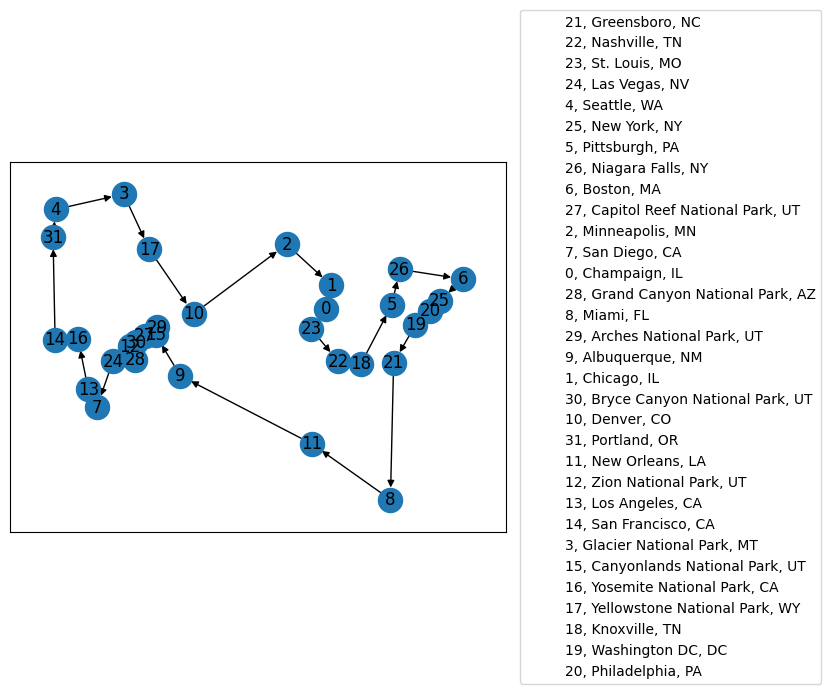

In [35]:

G = nx.from_numpy_array(RouteDistance)

G = nx.DiGraph()

for i in range(len(Locations)):
    G.add_node(i, pos = (Longitudes[i], Latitudes[i]))
    for j in range(len(Locations)):
        if (RouteDistance[i][j] != 0):
            G.add_edge(i,j,weight=RouteDistance[i][j])
        
nx.draw_networkx(G,nx.get_node_attributes(G,"pos"),with_labels=True)
handles_dict = {patches.Patch(color='white', label=f"{k}, {v}") for k,v in LocationDict.items()}
plt.legend(handles=handles_dict,loc='right',bbox_to_anchor=(1.65,0.5))
plt.show()

In [36]:
Zeros = np.zeros(len(Routing))
LongLat = pd.DataFrame({"Locations":Zeros,
                       "Latitudes":Zeros,
                       "Longitudes":Zeros})
for i in range(len(Routing)):
    LongLat.loc[i] = [Locations[Routing[i]],Latitudes[Routing[i]],Longitudes[Routing[i]]]
LongLat

C:\Users\imtha\AppData\Local\Temp\ipykernel_15324\1945687795.py:6: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Champaign, IL' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,Locations,Latitudes,Longitudes
0,"Champaign, IL",40.116420,-88.243383
1,"St. Louis, MO",38.627003,-90.199404
2,"Nashville, TN",36.162664,-86.781602
3,"Knoxville, TN",35.960638,-83.920739
4,"Pittsburgh, PA",40.440625,-79.995886
5,"Niagara Falls, NY",43.096214,-79.037739
6,"Boston, MA",42.360082,-71.058880
7,"New York, NY",40.712775,-74.005973
8,"Philadelphia, PA",39.952584,-75.165222
9,"Washington DC, DC",38.907192,-77.036871


In [37]:
fig = px.line_geo(LongLat,lat="Latitudes",lon="Longitudes",hover_name="Locations",markers=True)
fig.update_layout(geo_scope="usa",height=500)
fig.show()

In [38]:
DurationHours = int(TotalDuration)
DurationMinutes = math.ceil((TotalDuration % 1) * 60)

if (DurationMinutes == 60):
    DurationHours += 1
    DurationMinutes = 0

TripDays = math.ceil(TotalDuration / 6)

print("The trip takes",DurationHours,"hours and",DurationMinutes,"minutes.")
print("At 6 hours per day, it takes",TripDays,"days to finish the trip.")

The trip takes 171 hours and 52 minutes.
At 6 hours per day, it takes 29 days to finish the trip.
